<a href="https://colab.research.google.com/github/valengasss/Classification-and-Summarization/blob/main/analisis_sentimen_shopee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Klasifikasi Sentimen/Ulasan COD Shopee***

# Memunculkan tombol untuk upload file

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Data ulasan Shopee tentang Cash On Delivery.csv to Data ulasan Shopee tentang Cash On Delivery (2).csv


# Membaca File CsV kedalam DataFrame dan Menampilkan 5 Baris Pertama

In [ ]:
import pandas as pd

df = pd.read_csv("Data ulasan Shopee tentang Cash On Delivery.csv")

df.head()


,userName,score,at,content;;
0,"Hilleria Nababan,4,2023-12-29 04:06:22,""Aplika...",NaN,NaN,NaN
1,Wahyu Hidayat,1,2023-12-28 13:48:07,Aplikasi nya sedikit tidak bertanggung jawab k...
2,"Ahmad Joko,1,2023-12-28 13:41:09,""Tolong siste...",NaN,NaN,NaN
3,Welson Bekak,1,2023-12-28 09:35:52,Saya kecewa dengan Shopie karena saya pesan ba...
4,"Chandra,3,2023-12-27 12:29:25,""Ada berapa expe...",NaN,NaN,NaN


# Cek informasi kolom, jumlah data, dan tipe datanya dan Cek apakah ada nilai koson di kolom-kolom

In [ ]:
# Cek informasi kolom, jumlah data, dan tipe datanya
df.info()

# Cek apakah ada nilai kosong di kolom-kolom
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userName   1840 non-null   object
 1   score      546 non-null    object
 2   at         547 non-null    object
 3   content;;  546 non-null    object
dtypes: object(4)
memory usage: 57.6+ KB


,0
userName,0
score,1294
at,1293
content;;,1294


# Menghapus baris yang ada nilai kosongnya dan Cek Ulang Jumlah Data

In [ ]:
# Menghapus baris yang ada nilai kosongnya
df.dropna(inplace=True)

df.shape


(546, 4)

In [ ]:
df.columns


Index(['userName', 'score', 'at', 'content;;'], dtype='object')

# Hapus spasi dan karakter aneh dari nama kolom dan Cek Ulang nama kolom setelah dibersihkan

In [ ]:
# Hapus spasi dan karakter aneh dari nama kolom
df.columns = df.columns.str.strip().str.replace(";", "", regex=False)

# Cek ulang nama kolom setelah dibersihkan
df.columns


Index(['userName', 'score', 'at', 'content'], dtype='object')

# Klasifikasi Sentimen

In [ ]:
def klasifikasi_sentimen(teks):
    teks = str(teks).lower()
    if "tidak" in teks or "buruk" in teks or "jelek" in teks or "telat" in teks:
        return "Negatif"
    elif "bagus" in teks or "cepat" in teks or "mantap" in teks or "puas" in teks:
        return "Positif"
    else:
        return "Netral"

df["Sentimen"] = df["content"].apply(klasifikasi_sentimen)


In [ ]:
df[["content", "Sentimen"]].head(10)


,content,Sentimen
1,Aplikasi nya sedikit tidak bertanggung jawab k...,Negatif
3,Saya kecewa dengan Shopie karena saya pesan ba...,Negatif
6,maaf ganggu kak..tapi knp ya tulisan di barang...,Netral
7,shopee makin mantap terima kasih sudah memberi...,Positif
8,Saya tdk suka yg mengantar barang iya.. walaup...,Negatif
9,Buset 5x belanja tertulis gratis ongkir via co...,Netral
10,Saya puas banget sama shopee meskipun beberapa...,Positif
13,Sangat Puas dgn Shopee ...ketika kami belanja ...,Positif
19,Saya senang belanja disini Tapi saya mendapat ...,Negatif
20,Kok sekarang gak bisa belanja 150 ke atas mala...,Netral


# Distribusi Sentimen Ulasan

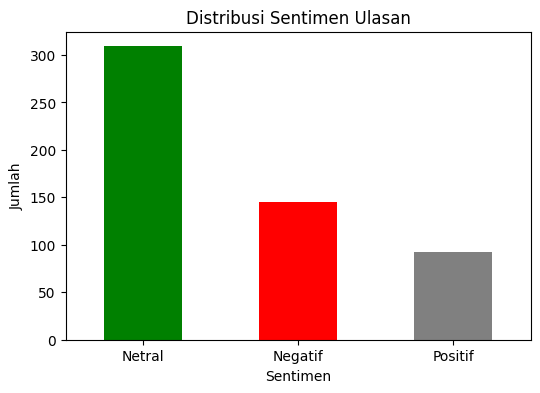

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah masing-masing sentimen
sentimen_counts = df["Sentimen"].value_counts()

# Visualisasikan
plt.figure(figsize=(6,4))
sentimen_counts.plot(kind="bar", color=["green", "red", "gray"])
plt.title("Distribusi Sentimen Ulasan")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.show()


## ***Ringkasan Sentimen/Ulasan COD Shopee***

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Unduh resource 'punkt_tab'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

stop_words = set(stopwords.words("indonesian"))

def ringkasan_ulasan(sentimen):
    # Ambil semua ulasan berdasarkan label sentimen
    teks = " ".join(df[df["Sentimen"] == sentimen]["content"].astype(str).tolist()).lower()

    # Tokenisasi kata
    tokens = word_tokenize(teks)

    # Hilangkan kata-kata umum (stopwords) dan tanda baca
    filtered = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Ambil 10 kata paling sering muncul sebagai ringkasan sederhana
    ringkasan = Counter(filtered).most_common(10)

    return ringkasan


In [ ]:
print("🔹 Ringkasan Ulasan Positif:")
print(ringkasan_ulasan("Positif"))

print("\n🔹 Ringkasan Ulasan Negatif:")
print(ringkasan_ulasan("Negatif"))

print("\n🔹 Ringkasan Ulasan Netral:")
print(ringkasan_ulasan("Netral"))


🔹 Ringkasan Ulasan Positif:
[('cod', 101), ('shopee', 59), ('bagus', 49), ('barang', 42), ('nya', 39), ('cepat', 33), ('belanja', 31), ('aplikasi', 23), ('pengiriman', 22), ('yg', 20)]

🔹 Ringkasan Ulasan Negatif:
[('cod', 175), ('shopee', 84), ('barang', 66), ('yg', 65), ('nya', 55), ('kurir', 41), ('belanja', 39), ('paket', 38), ('pembayaran', 33), ('bayar', 31)]

🔹 Ringkasan Ulasan Netral:
[('cod', 367), ('shopee', 167), ('nya', 136), ('gak', 108), ('belanja', 99), ('yg', 99), ('barang', 76), ('ongkir', 56), ('tolong', 55), ('pembayaran', 54)]


In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [ ]:
def tampilkan_wordcloud(sentimen):
    teks = ' '.join(df[df['sentimen'] == sentimen]['content_clean'])  # asumsi kamu sudah buat kolom 'content_clean'
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(teks)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud Ulasan {sentimen}", fontsize=16)
    plt.show()


In [ ]:
df.columns


Index(['userName', 'score', 'at', 'content', 'Sentimen'], dtype='object')

In [ ]:
df['score'] = pd.to_numeric(df['score'], errors='coerce')  # ubah jadi angka, jika error jadikan NaN


In [ ]:
df = df.dropna(subset=['score'])  # hapus baris dengan skor kosong


In [ ]:
def klasifikasi(score):
    if score >= 4:
        return "Positif"
    elif score == 3:
        return "Netral"
    else:
        return "Negatif"

df['sentimen'] = df['score'].apply(klasifikasi)


<ipython-input-54-8be7bad57449>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = df['score'].apply(klasifikasi)


In [ ]:
df[['score', 'sentimen']].head()


,score,sentimen
1,1.0,Negatif
3,1.0,Negatif
6,2.0,Negatif
7,5.0,Positif
8,2.0,Negatif


In [ ]:
df = df.rename(columns=lambda x: x.strip())  # hilangkan spasi di nama kolom
df = df.rename(columns={'content;;': 'content'})  # ubah nama kolom yang aneh


In [ ]:
import re

def bersihkan(teks):
    teks = teks.lower()
    teks = re.sub(r'[^a-zA-Z\s]', '', teks)
    return teks

df['content_clean'] = df['content'].astype(str).apply(bersihkan)


In [ ]:
df[['content', 'content_clean']].head()


,content,content_clean
1,Aplikasi nya sedikit tidak bertanggung jawab k...,aplikasi nya sedikit tidak bertanggung jawab k...
3,Saya kecewa dengan Shopie karena saya pesan ba...,saya kecewa dengan shopie karena saya pesan ba...
6,maaf ganggu kak..tapi knp ya tulisan di barang...,maaf ganggu kaktapi knp ya tulisan di barangny...
7,shopee makin mantap terima kasih sudah memberi...,shopee makin mantap terima kasih sudah memberi...
8,Saya tdk suka yg mengantar barang iya.. walaup...,saya tdk suka yg mengantar barang iya walaupun...


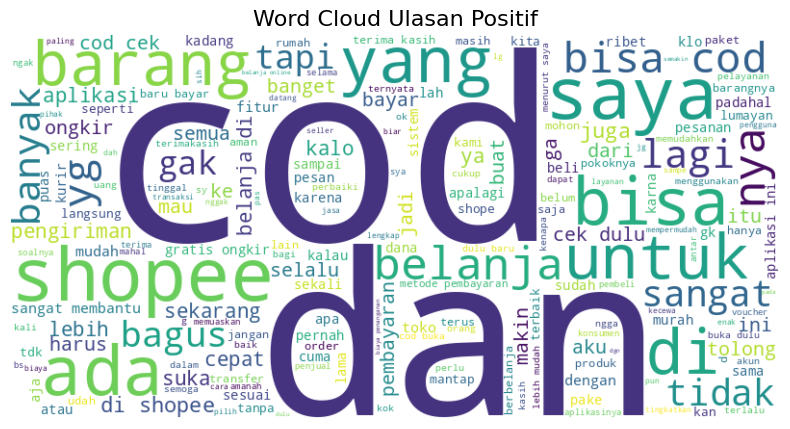

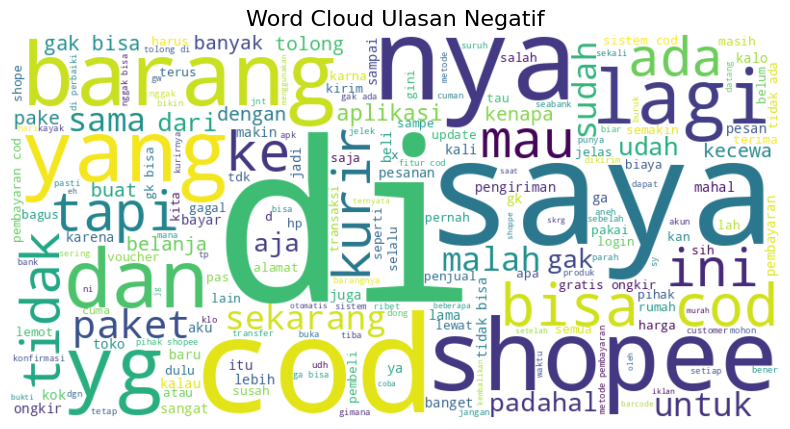

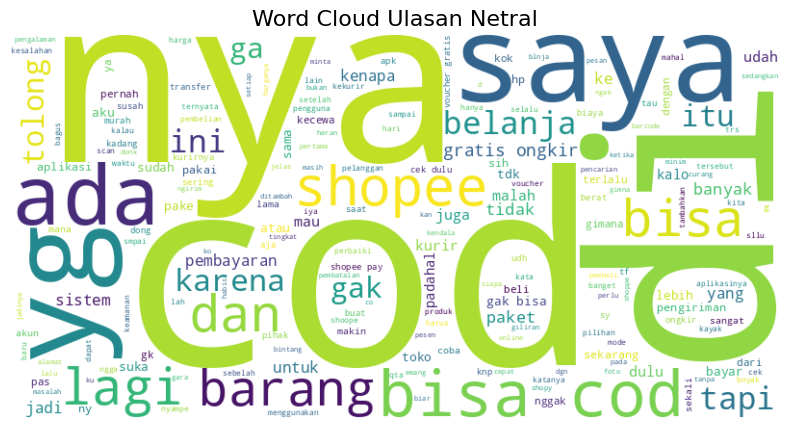

In [ ]:
tampilkan_wordcloud("Positif")
tampilkan_wordcloud("Negatif")
tampilkan_wordcloud("Netral")


# Analytical Result

**Distribusi Sentimen**:Sentimen netral mendominasi ulasan, menunjukkan bahwa banyak pengguna hanya menyampaikan pengalaman secara informatif tanpa ekspresi emosi yang kuat. Sentimen negatif lebih banyak dibanding positif, yang mengindikasikan adanya ketidakpuasan terhadap pengalaman menggunakan fitur Cash on Delivery (COD).


**Frekuensi Data**: Kata *“cod”* merupakan kata yang paling sering muncul di ketiga kategori sentimen (positif, negatif, dan netral), menandakan bahwa fitur COD merupakan inti dari topik ulasan.

# Insight & Finding

**Aspek Positif**:Ulasan dengan sentimen positif umumnya mengapresiasi:

    * Kepraktisan sistem COD
    * Kemudahan dalam metode pembayaran
    * Ketepatan waktu pengiriman


Aspek **Negatif**

  * Ulasan negatif sebagian besar berisi keluhan terhadap:

    * Kurir yang tidak responsif atau tidak profesional
    * Keterlambatan pengiriman
    * Gangguan atau kesalahan dalam sistem COD



**Akar Permasalahan**:

  * Masalah utama bukan pada konsep COD itu sendiri, melainkan pada implementasi dan eksekusi layanan di lapangan.


# Rekomendasi

1. *Peningkatan Layanan Logistik:*

   * Evaluasi kinerja mitra kurir dan lakukan pelatihan ulang terkait standar pelayanan pelanggan.
   * Optimalkan sistem tracking dan estimasi waktu pengiriman agar lebih akurat dan transparan.

2. *Perbaikan Sistem COD:*

   * Pastikan sistem pembayaran COD berjalan tanpa gangguan teknis.
   * Terapkan proses validasi sistem yang lebih ketat untuk mencegah kesalahan pembayaran atau konfirmasi pengiriman.

3. *Edukasi Pengguna:*

   * Buat panduan visual/interaktif tentang cara penggunaan COD yang benar.
   * Komunikasikan batasan atau ketentuan fitur COD secara jelas di halaman checkout dan notifikasi pembelian.

4. *Pemantauan Sentimen Secara Berkala:*

   * Lanjutkan pemantauan sentimen pengguna untuk mengetahui tren keluhan atau pujian secara real-time guna mendukung pengambilan keputusan berbasis data.
